^This is built from following https://github.com/llSourcell/Predicting_Winning_Teams/blob/master/Prediction.ipynb

## Predicting Outcomes for English Premier League Football

This project will compare various machine learning algorithms on predicting outcomes for the english premier league football.


## Import the Dependencies

In [27]:
#data preprocessing
import pandas as pd

#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
import xgboost as xgb

#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression

#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier

#a discriminative classifier formally defined by a separating hyperplane.
from sklearn.svm import SVC

#displayd data
from IPython.display import display

%matplotlib inline

In [9]:
# Read data and drop redundant column.
data = pd.read_csv('final_dataset.csv')

# Preview data
display(data.head())

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW
0,0,2006-08-19,Arsenal,Aston Villa,1,1,D,0,0,0,...,M,M,M,M,M,M,M,M,M,1
1,1,2006-08-19,Bolton,Tottenham,2,0,H,0,0,0,...,M,M,M,M,M,M,M,M,M,1
2,2,2006-08-19,Everton,Watford,2,1,H,0,0,0,...,M,M,M,M,M,M,M,M,M,1
3,3,2006-08-19,Newcastle,Wigan,2,1,H,0,0,0,...,M,M,M,M,M,M,M,M,M,1
4,4,2006-08-19,Portsmouth,Blackburn,3,0,H,0,0,0,...,M,M,M,M,M,M,M,M,M,1


## Data Exploration

In [23]:
# What is the win rate for the home team?

# total number of matches
n_matches = data.shape[0]

# Number of features
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.FTR == 'H'])

# Calculate matches won by home team.
n_awaywins = len(data[data.FTR == 'A'])

# Calculate matches won by home team.
n_draw = len(data[data.FTR == 'D'])

home_winrate = (n_homewins / n_matches) * 100

# Ouptut the results
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by home team: {}".format(n_homewins))
print("Number of matches won by away team: {}".format(n_awaywins))
print("Number of matches result in draw: {}".format(n_draw))
print("\nThe win rate of the home team: {:.2f}%".format(home_winrate))

Total number of matches: 4180
Number of features: 23
Number of matches won by home team: 1935
Number of matches won by away team: 1180
Number of matches result in draw: 1065

The win rate of the home team: 46.29%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001452535AB00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000145281035C0>]], dtype=object)

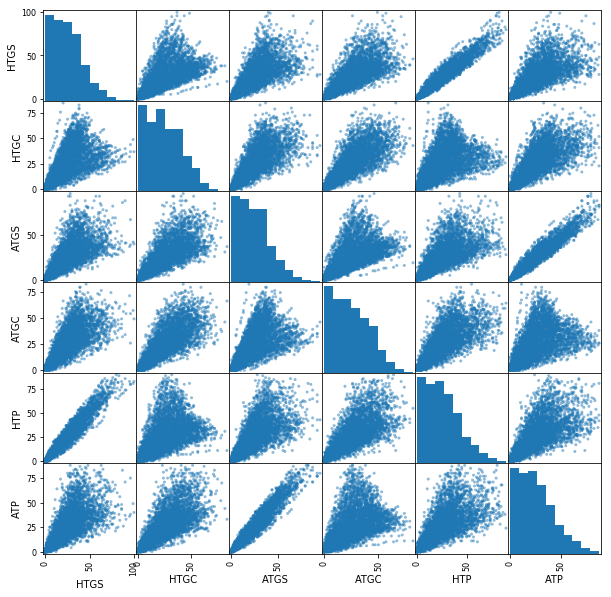

In [31]:
# Visualizing the distribution of the data
from pandas.plotting import scatter_matrix

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(data[['HTGS', 'HTGC', 'ATGS', 'ATGC', 'HTP','ATP']], figsize=(10,10))

## Preparing the Data

## Training the Model